In [ ]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DataScienceLab/01.31/[0131][HW]_LinearRegression_and_SVM/data/house.csv'
house = pd.read_csv(path)
house

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",63000,0
1,3,2232935032,37.657623,127.044115,dobong,아파트,매매,15,24,154,119,남향,기본 로얄동 로얄층 채광 GOOD,"['25년이내', '대단지', '대형평수', '방네개이상']",140000,0
2,4,2232502309,37.645001,127.040034,dobong,빌라,전세,3,4,38,33,남향,올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분,"['25년이상', '융자금적은', '올수리', '화장실한개']",15000,0
3,5,2232883418,37.666850,127.039420,dobong,아파트,매매,5,18,107,84,남향,내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주,"['25년이상', '방세개', '화장실두개', '주차가능']",60000,0
4,6,2234171117,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",700,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93990,104994,2233562154,37.503072,127.026543,gangnam,사무실,월세,5,6,148,90,남향,신논현역.신축. 첫 입주.층고3.8m.통창뷰,"['2년이내', '융자금없는', '역세권']",7000,700
93991,104995,2232902002,37.470845,127.088900,gangnam,아파트,전세,3,18,85,59,남향,남향. 초입. 막히지 않은 탁트인 슢뷰.,"['10년이내', '대단지', '방세개']",58000,0
93992,104996,2234189106,37.520802,127.024247,gangnam,단독/다가구,전세,4,5,105,79,남동향,리모델링완료 애완동물협의가능 금액조절가능,"['25년이내', '융자금없는', '방세개']",55000,0
93993,104998,2233833725,37.519625,127.038073,gangnam,아파트,매매,8,12,83,59,북향,"로얄층,올수리, 뷰가 정말 예쁩니다.","['25년이상', '올수리', '방세개']",140000,0


In [ ]:
house.shape

(93995, 16)

0         63000
1        140000
2         15000
3         60000
4           700
          ...  
93990      7000
93991     58000
93992     55000
93993    140000
93994     20000
Name: deposit, Length: 93995, dtype: int64

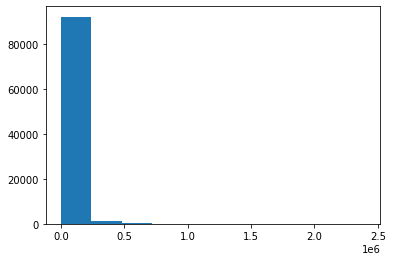

In [ ]:
y_label = house.loc[:,'deposit']

y_label.value_counts()
plt.hist(y_label.values)
y_label

In [ ]:
X_feature = house.drop(['deposit'], axis = 1)


In [ ]:
X_feature.head()
#범주형 : gu, goodsType, payType, direction
#연속형 : 나머지
#의미없는 데이터 : Unnamed, id, lat, lng, tag, taglist

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",0
1,3,2232935032,37.657623,127.044115,dobong,아파트,매매,15,24,154,119,남향,기본 로얄동 로얄층 채광 GOOD,"['25년이내', '대단지', '대형평수', '방네개이상']",0
2,4,2232502309,37.645001,127.040034,dobong,빌라,전세,3,4,38,33,남향,올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분,"['25년이상', '융자금적은', '올수리', '화장실한개']",0
3,5,2232883418,37.666850,127.039420,dobong,아파트,매매,5,18,107,84,남향,내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주,"['25년이상', '방세개', '화장실두개', '주차가능']",0
4,6,2234171117,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",44


In [ ]:
#의미없는 변수 제거(Unnamed, id, lat, lng, tag, taglist)
house = house.drop(['Unnamed: 0','id','lat','lng','tag','tagList'], axis = 1)

In [ ]:
house.head()

,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,deposit,monthlyPay
0,dobong,아파트,매매,5,5,81,63,남향,63000,0
1,dobong,아파트,매매,15,24,154,119,남향,140000,0
2,dobong,빌라,전세,3,4,38,33,남향,15000,0
3,dobong,아파트,매매,5,18,107,84,남향,60000,0
4,dobong,사무실,월세,2,8,30,22,북향,700,44


In [ ]:
house.isnull().sum()
#새로운 class 만듬

gu                 0
goodsType          0
payType            0
floor              0
floor_total        0
contractArea       0
realArea           0
direction       3204
deposit            0
monthlyPay         0
dtype: int64

In [ ]:
house = house.drop(['direction'], axis = 1)

In [ ]:
house

,gu,goodsType,payType,floor,floor_total,contractArea,realArea,deposit,monthlyPay
0,dobong,아파트,매매,5,5,81,63,63000,0
1,dobong,아파트,매매,15,24,154,119,140000,0
2,dobong,빌라,전세,3,4,38,33,15000,0
3,dobong,아파트,매매,5,18,107,84,60000,0
4,dobong,사무실,월세,2,8,30,22,700,44
...,...,...,...,...,...,...,...,...,...
93990,gangnam,사무실,월세,5,6,148,90,7000,700
93991,gangnam,아파트,전세,3,18,85,59,58000,0
93992,gangnam,단독/다가구,전세,4,5,105,79,55000,0
93993,gangnam,아파트,매매,8,12,83,59,140000,0


In [ ]:
#범주형 : gu, goodsType, payType

In [ ]:
len(house.gu.value_counts())

25

In [ ]:
len(house.goodsType.value_counts())

15

In [ ]:
house.payType.value_counts()

월세      37803
매매      30918
전세      24918
단기임대      356
Name: payType, dtype: int64

In [ ]:
gu = pd.get_dummies(house.loc[:, 'gu'])
gu.columns = ['gu1','gu2','gu3','gu4','gu5','gu6','gu7','gu8',
              'gu9','gu10','gu11','gu12','gu13','gu14','gu15','gu16',
              'gu17','gu18','gu19','gu20','gu21','gu22','gu23','gu24','gu25']
gu

,gu1,gu2,gu3,gu4,gu5,gu6,gu7,gu8,gu9,gu10,...,gu16,gu17,gu18,gu19,gu20,gu21,gu22,gu23,gu24,gu25
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93990,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93991,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93992,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93993,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gt = pd.get_dummies(house.loc[:,'goodsType'])
gt.columns = ['gt1','gt2','gt3','gt4','gt5',
              'gt6','gt7','gt8','gt9','gt10',
              'gt11','gt12','gt13','gt14','gt15']

gt

,gt1,gt2,gt3,gt4,gt5,gt6,gt7,gt8,gt9,gt10,gt11,gt12,gt13,gt14,gt15
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93990,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
93991,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
93992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93993,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
pt = pd.get_dummies(house.loc[:,'payType'])
pt.columns = ['pt1','pt2','pt3','pt4']

In [ ]:
pt

,pt1,pt2,pt3,pt4
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
93990,0,0,1,0
93991,0,0,0,1
93992,0,0,0,1
93993,0,1,0,0


In [ ]:
house = house.drop(['gu','goodsType','payType'], axis = 1)
house = pd.concat([house, gu], axis = 1)
house = pd.concat([house, gt], axis = 1)
house = pd.concat([house, pt], axis = 1)
house.head()

,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu1,gu2,gu3,gu4,...,gt10,gt11,gt12,gt13,gt14,gt15,pt1,pt2,pt3,pt4
0,5,5,81,63,63000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15,24,154,119,140000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,4,38,33,15000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,18,107,84,60000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,8,30,22,700,44,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


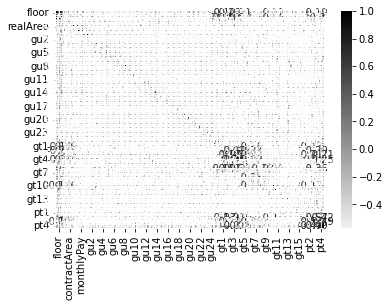

In [ ]:
y_label = house.loc[:,'deposit']
X_features = house.drop(['deposit'], axis = 1)
cmap = sns.light_palette(color = 'black', as_cmap = True)
sns.heatmap(X_features.corr(), annot = True, cmap = cmap)
plt.show()

In [ ]:
cor_matrix = abs(X_features.corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

,floor,floor_total,contractArea,realArea,monthlyPay,gu1,gu2,gu3,gu4,gu5,...,gt10,gt11,gt12,gt13,gt14,gt15,pt1,pt2,pt3,pt4
floor,0.000000,0.658059,0.000462,0.072648,0.002466,0.019436,0.007119,0.031721,0.033817,0.064500,...,0.121358,0.014536,0.002430,0.001677,0.052445,0.002807,0.008917,0.142144,0.193030,0.064377
floor_total,0.658059,0.000000,0.002100,0.087085,0.001066,0.026615,0.009306,0.032968,0.048048,0.082868,...,0.161778,0.021610,0.001986,0.003195,0.055632,0.003928,0.013398,0.165930,0.201487,0.049076
contractArea,0.000462,0.002100,0.000000,0.040837,0.001193,0.002051,0.001737,0.002353,0.002334,0.001755,...,0.005444,0.000318,0.000469,0.000086,0.002337,0.000056,0.000967,0.000821,0.005221,0.006539
realArea,0.072648,0.087085,0.040837,0.000000,0.026251,0.018583,0.017508,0.029733,0.024762,0.010782,...,0.099355,0.005022,0.003173,0.001572,0.034076,0.000648,0.017163,0.059969,0.145979,0.095947
monthlyPay,0.002466,0.001066,0.001193,0.026251,0.000000,0.001504,0.003187,0.001472,0.000582,0.001209,...,0.001895,0.000209,0.000619,0.000026,0.000512,0.000028,0.000233,0.005938,0.010305,0.005094
gu1,0.019436,0.026615,0.002051,0.018583,0.001504,0.000000,0.041394,0.041738,0.042228,0.039936,...,0.031392,0.005045,0.005754,0.000668,0.026275,0.000668,0.006460,0.063743,0.041377,0.020985
gu2,0.007119,0.009306,0.001737,0.017508,0.003187,0.041394,0.000000,0.041189,0.041673,0.039411,...,0.018064,0.006149,0.015492,0.000659,0.025930,0.000659,0.009786,0.018375,0.017615,0.001371
gu3,0.031721,0.032968,0.002353,0.029733,0.001472,0.041738,0.041189,0.000000,0.042019,0.039738,...,0.108914,0.003815,0.015620,0.000665,0.026145,0.000665,0.000712,0.013175,0.008802,0.023702
gu4,0.033817,0.048048,0.002334,0.024762,0.000582,0.042228,0.041673,0.042019,0.000000,0.040205,...,0.018202,0.014587,0.015804,0.000673,0.026452,0.000673,0.011837,0.046737,0.041200,0.002331
gu5,0.064500,0.082868,0.001755,0.010782,0.001209,0.039936,0.039411,0.039738,0.040205,0.000000,...,0.008368,0.009000,0.014946,0.016727,0.025016,0.000636,0.001881,0.025855,0.006271,0.034225


In [ ]:
np.sort(cor_matrix.values.flatten())[::-1]

array([0.65805887, 0.65805887, 0.60023278, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
# 상관관수값이 가장 큰 두 축을 찾기

idx = np.where(cor_matrix == cor_matrix.max().max())[0]
print('columns of max corr : {} & {}'.format(cor_matrix.columns[idx[0]], cor_matrix.columns[idx[1]]))

columns of max corr : floor & floor_total


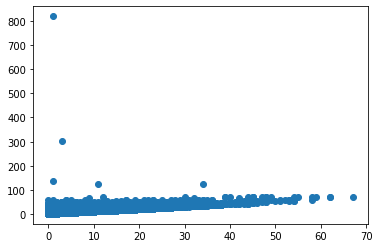

In [ ]:
plt.scatter(house.floor, house.floor_total)

In [ ]:
cor_matrix = abs(X_features.iloc[:,:5].corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

,floor,floor_total,contractArea,realArea,monthlyPay
floor,0.000000,0.658059,0.000462,0.072648,0.002466
floor_total,0.658059,0.000000,0.002100,0.087085,0.001066
contractArea,0.000462,0.002100,0.000000,0.040837,0.001193
realArea,0.072648,0.087085,0.040837,0.000000,0.026251
monthlyPay,0.002466,0.001066,0.001193,0.026251,0.000000


In [ ]:
np.sort(cor_matrix.values.flatten())[::-1]

array([6.58058867e-01, 6.58058867e-01, 8.70849696e-02, 8.70849696e-02,
       7.26476225e-02, 7.26476225e-02, 4.08374464e-02, 4.08374464e-02,
       2.62508669e-02, 2.62508669e-02, 2.46639382e-03, 2.46639382e-03,
       2.10042675e-03, 2.10042675e-03, 1.19290345e-03, 1.19290345e-03,
       1.06565065e-03, 1.06565065e-03, 4.61966086e-04, 4.61966086e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [ ]:

print('floor :', X_features.loc[:,'floor'].corr(y_label))
print('floor_total :', X_features.loc[:,'floor_total'].corr(y_label))

floor : 0.30731296751290377
floor_total : 0.3739552529300187


In [ ]:
X2_features = X_features.drop(['floor'], axis = 1)
X2_features.columns

Index(['floor_total', 'contractArea', 'realArea', 'monthlyPay', 'gu1', 'gu2',
       'gu3', 'gu4', 'gu5', 'gu6', 'gu7', 'gu8', 'gu9', 'gu10', 'gu11', 'gu12',
       'gu13', 'gu14', 'gu15', 'gu16', 'gu17', 'gu18', 'gu19', 'gu20', 'gu21',
       'gu22', 'gu23', 'gu24', 'gu25', 'gt1', 'gt2', 'gt3', 'gt4', 'gt5',
       'gt6', 'gt7', 'gt8', 'gt9', 'gt10', 'gt11', 'gt12', 'gt13', 'gt14',
       'gt15', 'pt1', 'pt2', 'pt3', 'pt4'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X2_features.columns
vif["VIF Factor"] = [variance_inflation_factor(X2_features.values, i) for i in range(X2_features.shape[1])]
vif


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,floor_total,1.929611
1,contractArea,1.002142
2,realArea,1.135516
3,monthlyPay,1.001068
4,gu1,inf
5,gu2,inf
6,gu3,inf
7,gu4,inf
8,gu5,inf
9,gu6,inf


In [ ]:
from sklearn.model_selection import train_test_split

# X3_features 사용; X4_features의 경우, 학습이후에 만들어진 데이터임으로

train_X, test_X, train_y, test_y = train_test_split(X2_features, y_label, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(75196, 48) (18799, 48) (75196,) (18799,)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_regr(y, pred):
    rmse_val = np.sqrt(mean_squared_error(y, pred))
    mae_val = mean_absolute_error(y,pred)

    print('RMSE : {0:.3F}, MAE : {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

RMSE : 52960.786, MAE : 25452.756


<BarContainer object of 2 artists>

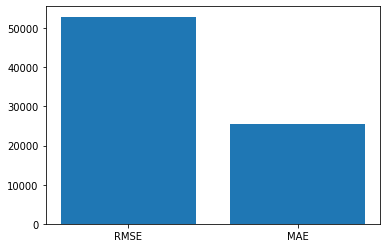

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(train_X, train_y)
pred = LR_model.predict(test_X)
result = evaluate_regr(test_y, pred)
plt.bar(['RMSE','MAE'], result)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.08007e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.07989e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.07991e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.07996e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

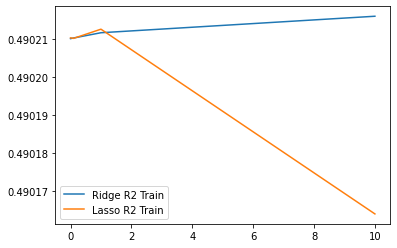

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10]

from sklearn import metrics
from sklearn.metrics import r2_score

ridge_r2_list_train = []
ridge_r2_list_test = []
lasso_r2_list_train = []
lasso_r2_list_test = []

for alpha in alpha_list:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    ridge_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X,train_y,scoring='r2',cv=15)))
    lasso_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X,train_y,scoring='r2',cv=15)))
plt.plot(alpha_list, ridge_r2_list_train, label='Ridge R2 Train')
plt.plot(alpha_list, lasso_r2_list_train, label='Lasso R2 Train')

plt.legend()

In [ ]:
ridge_r2_list_train

[0.4902101987890156,
 0.49021021367426804,
 0.49021036174194227,
 0.4902117469019653,
 0.4902160900410853]

In [ ]:
lasso_r2_list_train

[0.49021039339589173,
 0.49021040003505784,
 0.49021026361895914,
 0.49021268215692354,
 0.49016403022347527]

In [ ]:
idx1 = np.array(ridge_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index
idx2 = np.array(lasso_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index

print('Ridge best alpha :', alpha_list[idx1])
print('Lasso best alpha :', alpha_list[idx2])

Ridge best alpha : 10
Lasso best alpha : 1


In [ ]:
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 1)
ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

print("R square score for Ridge model : {:.5f}".format(r2_score(test_y, ridge.predict(test_X))))
print("R square score for Lasso model : {:.5f}".format(r2_score(test_y, lasso.predict(test_X))))

print("MSE for Ridge model : {:.5f}".format(mean_squared_error(test_y, ridge.predict(test_X))))
print("MSE for Lasso model : {:.5f}".format(mean_squared_error(test_y, lasso.predict(test_X))))

R square score for Ridge model : 0.46553
R square score for Lasso model : 0.46552
MSE for Ridge model : 2804871122.03334
MSE for Lasso model : 2804944613.03062


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+12, tolerance: 3.692e+10
  model = cd_fast.enet_coordinate_descent(


RMSE : 52961.034, MAE : 25435.496


<BarContainer object of 2 artists>

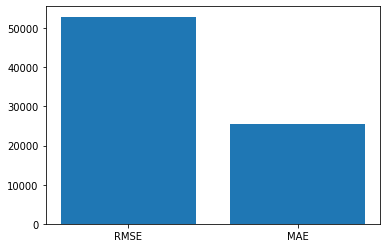

In [ ]:
pred = ridge.predict(test_X)
result = evaluate_regr(test_y, pred)
plt.bar(['RMSE', 'MAE'], result)

RMSE : 52961.728, MAE : 25447.561


<BarContainer object of 2 artists>

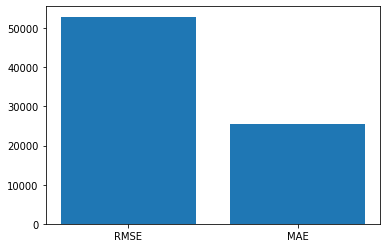

In [ ]:
pred = lasso.predict(test_X)
result = evaluate_regr(test_y, pred)
plt.bar(['RMSE','MAE'], result)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


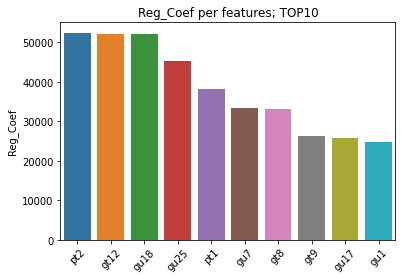

In [ ]:
coef = ridge.coef_
coef_abs = np.abs(coef)
idx = coef_abs.argsort()[::-1]
coef_abs = coef_abs[idx]
name = X2_features.head(1).columns[idx].values
sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP10')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
total_data = pd.concat([X2_features, y_label], axis = 1)
scaler = MinMaxScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)
trans_data_df = pd.DataFrame(data = trans_data, columns = total_data.columns)
trans_data_df.head(1)

,floor_total,contractArea,realArea,monthlyPay,gu1,gu2,gu3,gu4,gu5,gu6,...,gt11,gt12,gt13,gt14,gt15,pt1,pt2,pt3,pt4,deposit
0,0.00489,0.000059,0.005172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.02625


In [ ]:
from sklearn.preprocessing import StandardScaler

total_data = pd.concat([X2_features, y_label], axis=1)

scaler = StandardScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1)

,floor_total,contractArea,realArea,monthlyPay,gu1,gu2,gu3,gu4,gu5,gu6,...,gt11,gt12,gt13,gt14,gt15,pt1,pt2,pt3,pt4,deposit
0,-0.755197,-0.011043,-0.124472,-0.008482,4.882634,-0.202114,-0.20379,-0.206185,-0.194993,-0.204807,...,-0.024633,-0.076649,-0.003262,-0.128292,-0.003262,-0.061659,1.428334,-0.820212,-0.600606,0.180513


In [ ]:
ridge.coef_

array([ 9.93627376e+02,  1.26694508e-02,  9.77899720e+01, -1.09866500e-03,
       -2.46786833e+04, -8.42015526e+03,  1.55868508e+03, -1.28415409e+04,
       -1.68238021e+04, -6.59322608e+02,  3.33735723e+04, -5.78466195e+03,
       -1.27416561e+04, -1.66052059e+04, -9.07509297e+03,  5.16982810e+03,
        4.23648922e+03, -4.06121808e+02, -1.29495989e+04,  6.31217468e+03,
       -2.57154291e+04,  5.21792250e+04, -6.18940350e+03, -1.54345766e+04,
        1.08940748e+04,  1.19997874e+04, -1.41144314e+03, -1.14723305e+03,
        4.51600907e+04, -2.88977952e+03, -1.42802537e+04, -2.09220432e+04,
       -4.02622078e+03, -1.84584387e+03,  2.06628272e+04,  1.83639253e+04,
       -3.31697906e+04, -2.63605359e+04, -4.61142710e+03,  1.70568272e+04,
        5.21830166e+04,  1.52749819e+03, -1.68819973e+03,  0.00000000e+00,
       -3.80357573e+04,  5.24299800e+04, -2.38711248e+04,  9.47690210e+03])

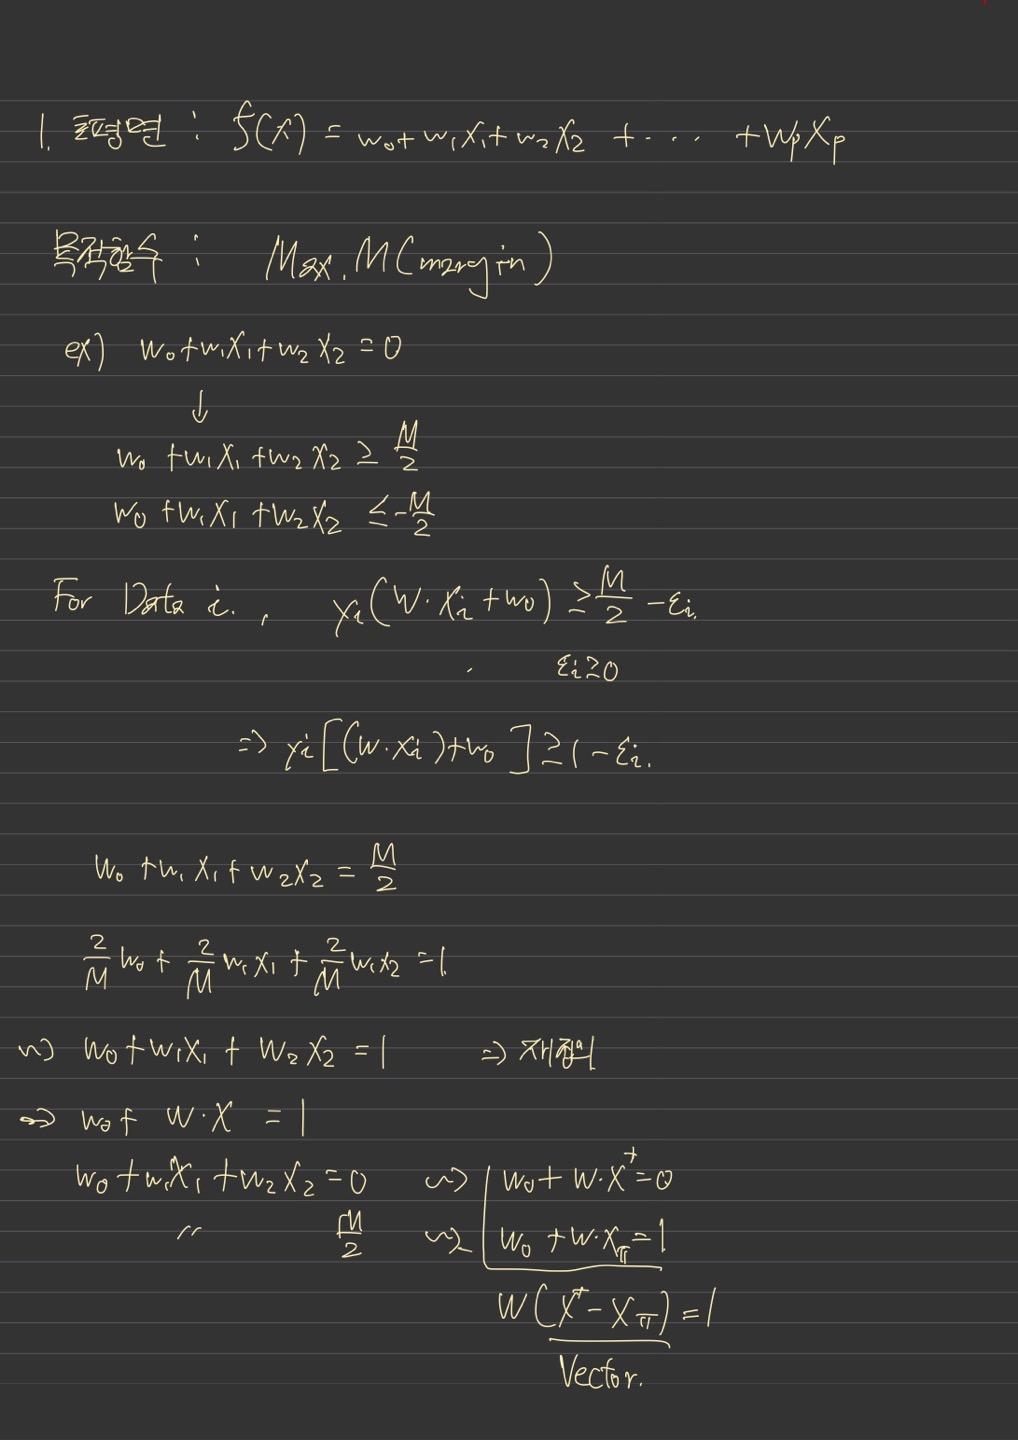bmm

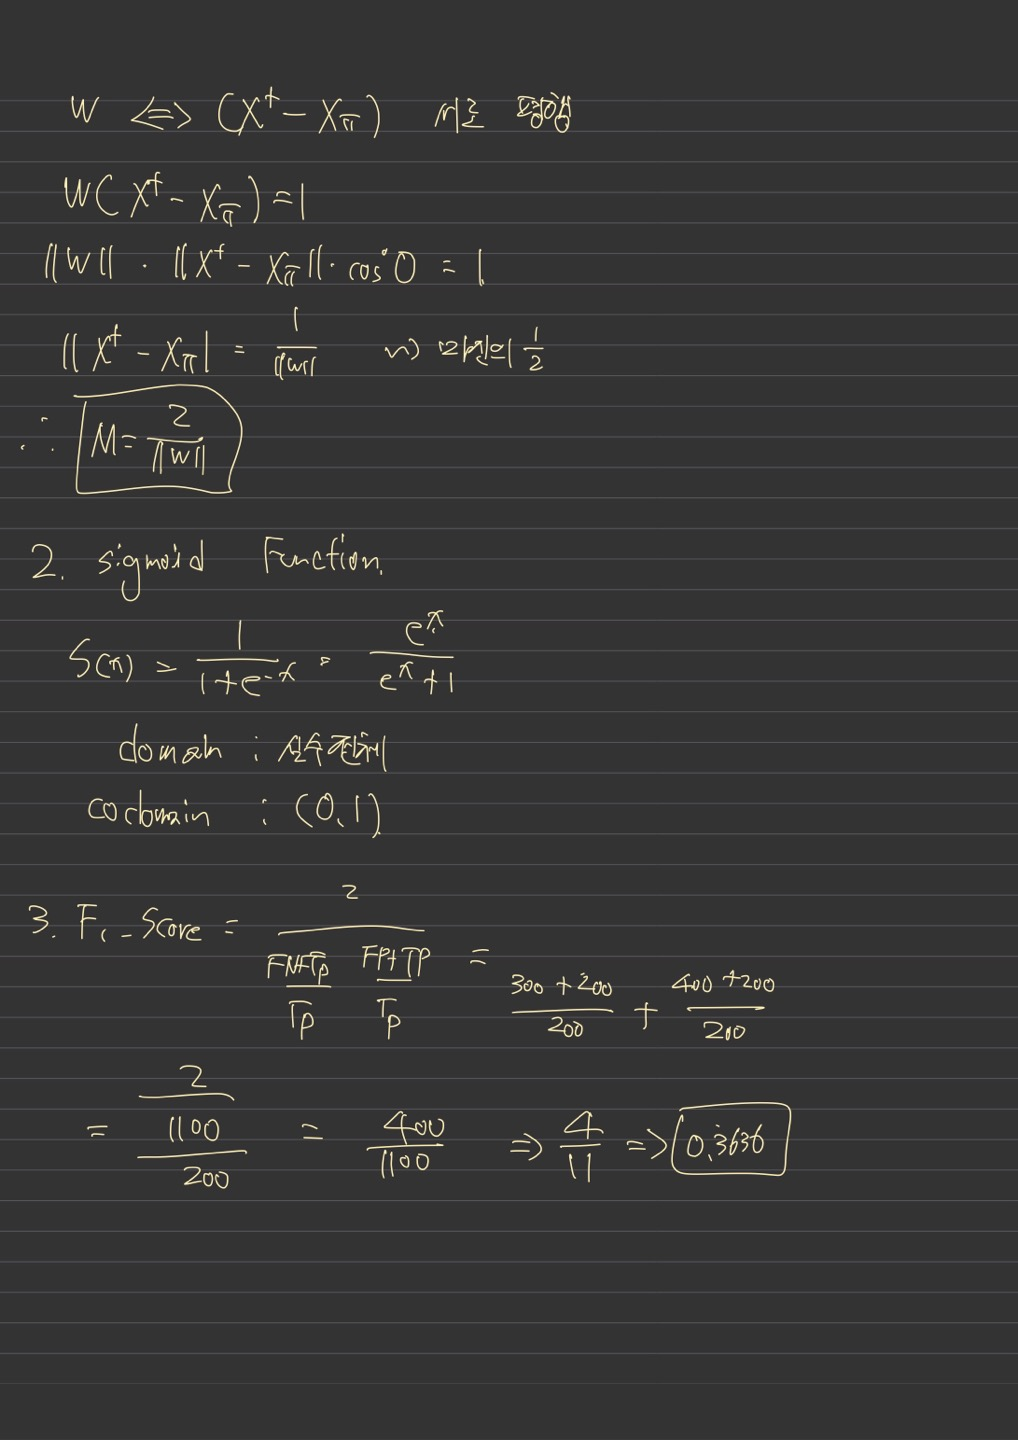